<a href="https://colab.research.google.com/github/dhikanarendrabhaskara/PySpark/blob/main/Getting%20Started%20with%20PySpark%20in%20Google%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GETTING STARTED WITH SPARK**

In [1]:
# Checking Java Version
!java -version

openjdk version "11.0.9.1" 2020-11-04
OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [2]:
# Checking Java Alternatives
!sudo update-alternatives --config java

There is only one alternative in link group java (providing /usr/bin/java): /usr/lib/jvm/java-11-openjdk-amd64/bin/java
Nothing to configure.


In [3]:
# Download Spark
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

In [4]:
# Extracting Spark Files
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

In [5]:
# Installing FindSpark
!pip install -q findspark

In [7]:
# Setting up Home Environment
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [8]:
# Creating Spark Session
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [9]:
# Stopping the Session
spark.stop()

------------------------------------------

**GETTING STARTED WITH PYSPARK**

In [2]:
# Installing PySpark
!pip install pyspark

     |████████████████████████████████| 204.2MB 76kB/s 
     |████████████████████████████████| 204kB 34.7MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=45c4d5abfd18c2722fc4bedcaacc3feb8bb66fc606b0c9511bd82a8ba4b1c58a
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [3]:
# Creating a Spark Context
from pyspark import SparkConf
from pyspark import SparkContext
conf = SparkConf()
conf.setMaster("local")
conf.setAppName("spark-basic")
sc = SparkContext(conf=conf)

- the **conf** object is the configuration for a Spark application
- we define the App Name & the Master URL in it
- **sc** is an object of SparkContext

In [4]:
# Function to calculate mod (example)
import numpy as np
def mod(x):
  return (x, np.mod(x, 2))

In [5]:
# Creating an RDD
rdd = sc.parallelize(range(1000)).map(mod).take(10)
print(rdd)

[(0, 0), (1, 1), (2, 0), (3, 1), (4, 0), (5, 1), (6, 0), (7, 1), (8, 0), (9, 1)]


- RDD is the **main logical data structure** in Spark
- Its a distributed collection of objects, stored in different machines of a cluster 
(a single RDD can be divided into multiple logical partitions so it can be stored & processed on different machines)
- It could cached & reused for future transformations
- **Lazy Evaluation**: Delaying expression until needed


In [6]:
# Creating an RDD using list
values = np.arange(1,6,1)
values

array([1, 2, 3, 4, 5])

In [7]:
my_rdd = sc.parallelize(values)
my_rdd

ParallelCollectionRDD[2] at readRDDFromFile at PythonRDD.scala:262

In [8]:
# Printing the first 3 elements in RDD
my_rdd.take(3)

[1, 2, 3]

In [9]:
# Uploading a file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving INTV KUY.txt to INTV KUY.txt


In [10]:
# Initializing an RDD using a Text File
rdd = sc.textFile("INTV KUY.txt")

# Printing the first 3 line in RDD
rdd.take(3)

['WORK & PERSONAL SUMMARY:',
 "Hi, my name's Dhika Bhaskara.",
 "I'm a business growth & analytics specialist. "]

In [11]:
# RDD Persistence
aba = sc.parallelize(range(1,10000,2))
aba.persist()

PythonRDD[8] at RDD at PythonRDD.scala:53

- Spark RDD is lazily evaluated, so when we wish to use the same RDD multiple times, it results in recomputing the RDD
- To avoid recomputing RDD multiple times, we use the persist() (the node that computes RDD will store its partitions)
- unpersist() removes them from the cache

In [12]:
aba.take(10)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

- Memory Level in Spark:

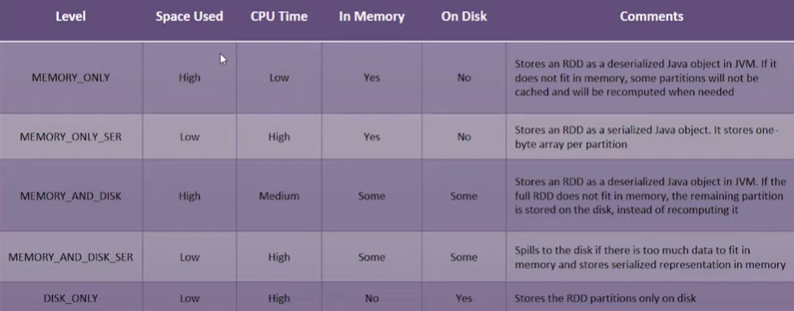

In [13]:
# RDD Caching: caching for fault-tolerance & using it without computing again
mytext = sc.textFile("INTV KUY.txt")
mytext.cache()

INTV KUY.txt MapPartitionsRDD[11] at textFile at NativeMethodAccessorImpl.java:0

--------------------------

**RDD TRANSFORMATIONS**

- MAP

In [14]:
# map: passes each elemnt through a function (returns a single item)
x = sc.parallelize(['aku','kamu','kita','berdua','bisa', 'dewa'])
y = x.map(lambda x: (x, 19))
y.collect()

[('aku', 19),
 ('kamu', 19),
 ('kita', 19),
 ('berdua', 19),
 ('bisa', 19),
 ('dewa', 19)]

In [15]:
sorted(y.collect()) # sorting by keys

[('aku', 19),
 ('berdua', 19),
 ('bisa', 19),
 ('dewa', 19),
 ('kamu', 19),
 ('kita', 19)]

- FLATMAP

In [16]:
# flatMap: passes each element through a function (returns a sequence)
x = sc.parallelize([1,5])
y = x.flatMap(lambda x: range(x,x+3))
sorted(y.collect())

[1, 2, 3, 5, 6, 7]

In [17]:
sorted(x.flatMap(lambda x: range(x,x+2)).collect())

[1, 2, 5, 6]

- FILTER

In [18]:
# filter: returns a collection of elements that passed the conditions of the function
x = sc.parallelize(range(1,11,1))
x.filter(lambda x: x%2 == 0).collect() # collecting even numbers only

[2, 4, 6, 8, 10]

In [19]:
x.filter(lambda x: x%2 != 0).collect() # collecting odd numbers only

[1, 3, 5, 7, 9]

- SAMPLE

In [20]:
# sample: sampling a fraction of the data [sample(withReplacement,fraction,seed)]
x = sc.parallelize(range(1,11,1))
x.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
x.sample(False,0.8,seed=1).count() # sampling without replacement

8

In [22]:
x.sample(False,0.8,seed=1).collect() 

[1, 3, 4, 5, 6, 7, 9, 10]

In [23]:
x.sample(True,0.8,seed=1).count() # sampling with replacement

10

In [24]:
x.sample(True,0.8,seed=1).collect() 

[1, 3, 3, 5, 5, 8, 9, 9, 9, 10]

- UNION

In [25]:
# union: return the union of two RDDs after concatenating their elements
x = sc.parallelize(range(1,7))
y = sc.parallelize(range(5,11))
x.union(y).collect() # supports double elements

[1, 2, 3, 4, 5, 6, 5, 6, 7, 8, 9, 10]

In [26]:
sorted(x.union(y).collect())

[1, 2, 3, 4, 5, 5, 6, 6, 7, 8, 9, 10]

- INTERSECTION

In [27]:
# intersection: like "union" but returns the intersections only
x = sc.parallelize(range(1,7))
y = sc.parallelize(range(5,11))
x.intersection(y).collect() # return the same elements

[6, 5]

- DISTINCT

In [28]:
# distinct: returns a new RDD with distinct/unique values from previously-unioned RDDs
x = sc.parallelize(range(1,7))
y = sc.parallelize(range(5,11))
sorted(x.union(y).distinct().collect())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

- SORTBY

In [29]:
# sortBy: returns sorted RDD
a = sc.parallelize([("B",10),("A",20),("C",30)])
a.sortBy(lambda x: x, True).collect() # sorting by key ASCENDING

[('A', 20), ('B', 10), ('C', 30)]

In [30]:
a.sortBy(lambda x: x, False).collect() # sorting by key DESCENDING

[('C', 30), ('B', 10), ('A', 20)]

- GROUPBY

In [31]:
# groupBy: returns a new RDD by grouping objects
a = sc.parallelize([1,1,2,3,5,8])
result = a.groupBy(lambda x: x%2).collect()
sorted([(x,sorted(y)) for (x,y) in result])

[(0, [2, 8]), (1, [1, 1, 3, 5])]

- ZIP

In [33]:
# zip: zips/pairs two RDDs together
x = sc.parallelize(range(0,5))
y = sc.parallelize(range(1000,1005))
x.zip(y).collect()

[(0, 1000), (1, 1001), (2, 1002), (3, 1003), (4, 1004)]

- ZIP-WITHINDEX

In [38]:
# zipWithIndex: zips/pairs RDDs with each of its index
sc.parallelize(['a','b','c','d']).zipWithIndex().collect()

[('a', 0), ('b', 1), ('c', 2), ('d', 3)]

- KEYBY

In [40]:
# keyBy: a special kind of mapping function 
x = sc.parallelize(range(0,3)).keyBy(lambda x: x*x)
y = sc.parallelize(zip(range(0,5), range(0,5)))
[(x, list(map(list, y))) for x,y in sorted(x.cogroup(y).collect())]

[(0, [[0], [0]]),
 (1, [[1], [1]]),
 (2, [[], [2]]),
 (3, [[], [3]]),
 (4, [[2], [4]])]

- REPARTITION

In [62]:
# repartition: used to increase/decrease the number of partitions (creates new partitions & does full shuffle)
rdd = sc.parallelize([1,2,3,4,5,6,7], 4) # 4 partitions
sorted(rdd.glom().collect())

[[1], [2, 3], [4, 5], [6, 7]]

In [57]:
len(rdd.repartition(2).glom().collect()) # made into 2 partitions

2

In [58]:
len(rdd.repartition(5).glom().collect()) # made into 5 partitions

5

- COALESCE

In [72]:
sc.parallelize([1,2,3,4,5,6,7], 4).collect() # without glom()

[1, 2, 3, 4, 5, 6, 7]

In [71]:
sc.parallelize([1,2,3,4,5,6,7], 4).glom().collect() # with glom()

[[1], [2, 3], [4, 5], [6, 7]]

In [75]:
# coalesce: reduce the number of partitions (using the existing partitions)
sc.parallelize([1,2,3,4,5,6,7], 4).coalesce(2).glom().collect() # coalesce into two partitions

[[1, 2, 3], [4, 5, 6, 7]]

------------------------------------------

**RDD ACTIONS**

- REDUCE

In [77]:
from operator import add
sc.parallelize([1,2,3,4,5]).reduce(add) # it adds all

15

- FIRST

In [81]:
sc.parallelize([1,2,3,4,5]).first() # takes first element

1

- TAKE

In [85]:
sc.parallelize([24,3,1,2,5,4,6,8,65,8,9]).take(3) # takes first 3

[24, 3, 1]

- TAKEORDERED

In [86]:
sc.parallelize([24,3,1,2,5,4,6,8,65,8,9]).takeOrdered(3) # takes first 3 in order

[1, 2, 3]

- COUNT

In [87]:
sc.parallelize([24,3,1,2,5,4,6,8,65,8,9]).count() # count the number of elements

11

- COLLECT

In [88]:
sc.parallelize([24,3,1,2,5,4,6,8,65,8,9]).collect() # returns all element

[24, 3, 1, 2, 5, 4, 6, 8, 65, 8, 9]

In [89]:
sc.parallelize([24,3,1,2,5,4,6,8,65,8,9]).distinct().collect() # returns distinct elements only

[24, 3, 1, 2, 5, 4, 6, 8, 65, 9]

- COLLECT AS MAP

In [90]:
x = sc.parallelize([(1,'a'),(2,'b'),(3,'c')])
x.collectAsMap() # returning elements as dictionary

{1: 'a', 2: 'b', 3: 'c'}

- SAVE AS TEXTFILE

In [93]:
x = sc.parallelize([24,3,1,2,5,4,6,8,65,8,9])
x.saveAsTextFile("/usr/bin/sample1.txt") # saving RDD into a textfile (online due to Colab)

- MATHEMATICS

In [101]:
a = sc.parallelize(range(1,11))
a.sum()

55

In [103]:
a.min()

1

In [104]:
a.max()

10

In [105]:
a.mean()

5.5

In [109]:
a.stdev()

2.8722813232690143

- COUNTBYVALUE

In [112]:
a = sc.parallelize([1,1,2,2,2,2,2,3,4,4,5])
a.countByValue() # counting each value

defaultdict(int, {1: 2, 2: 5, 3: 1, 4: 2, 5: 1})

- TO DEBUG STRING

In [121]:
a.toDebugString() # to check where it's natively stored

b'(1) ParallelCollectionRDD[300] at readRDDFromFile at PythonRDD.scala:262 []'

------------------------------------------------------------------------------

**WORKING WITH PAIRED RDDs**

In [123]:
# creating paired RDDs
x = sc.parallelize([('a1','b1','c1'),('a2','b2','c2')])
result = x.map(lambda x: (x[0],x[1:]))
result.collect()

[('a1', ('b1', 'c1')), ('a2', ('b2', 'c2'))]

- Transformations on 1-Paired RDD

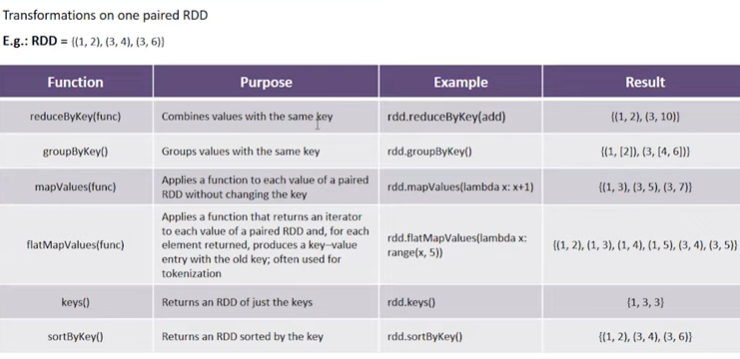

- Transformations on 2-Paired RDDs

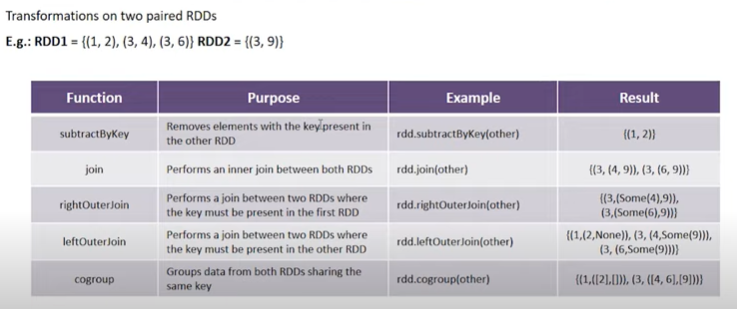

---------------------------------------------

RDD LINEAGE

- the graph of all parent RDDs (the serires of previous transformations)